In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dylanjcastillo/7k-books-with-metadata")

print("Path to dataset files:", path)

100%|██████████| 1.47M/1.47M [00:06<00:00, 223kB/s]

Extracting files...
Path to dataset files: /home/nisitha/.cache/kagglehub/datasets/dylanjcastillo/7k-books-with-metadata/versions/3


          isbn13      isbn10           title subtitle  \
0  9780002005883  0002005883          Gilead      NaN   
1  9780002261982  0002261987    Spider's Web  A Novel   
2  9780006163831  0006163831    The One Tree      NaN   
3  9780006178736  0006178731  Rage of angels      NaN   
4  9780006280897  0006280897  The Four Loves      NaN   

                           authors                     categories  \
0               Marilynne Robinson                        Fiction   
1  Charles Osborne;Agatha Christie  Detective and mystery stories   
2             Stephen R. Donaldson               American fiction   
3                   Sidney Sheldon                        Fiction   
4              Clive Staples Lewis                 Christian life   

                                           thumbnail  \
0  http://books.google.com/books/content?id=KQZCP...   
1  http://books.google.com/books/content?id=gA5GP...   
2  http://books.google.com/books/content?id=OmQaw...   
3  http://books.go

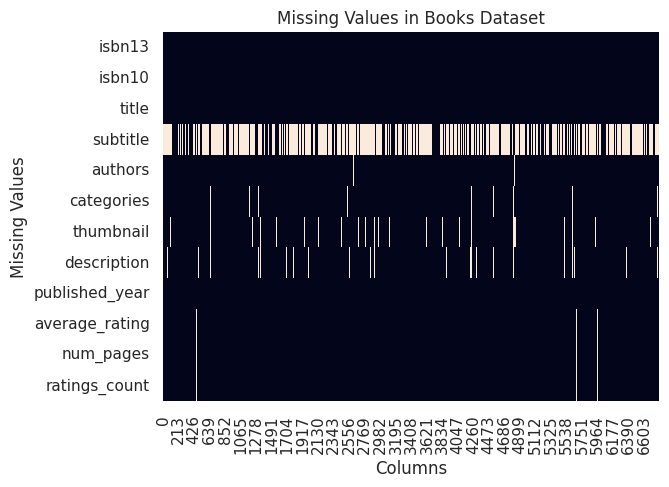

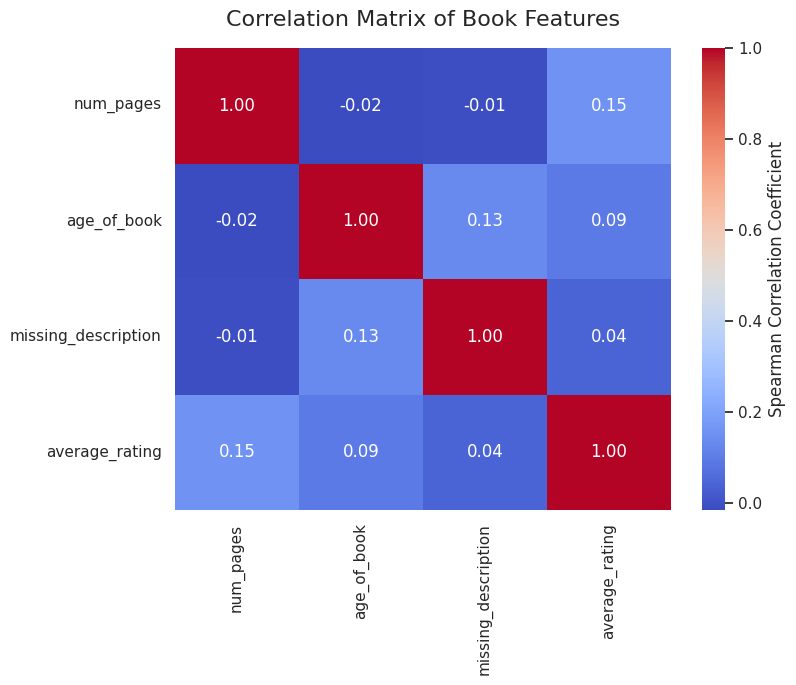

/tmp/ipykernel_98562/2701389118.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_missing["words_in_description"] = book_missing["description"].str.split().str.len()
/tmp/ipykernel_98562/2701389118.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_missing_25_words["title_and_subtitle"] = ( np.where(book_missing_25_words["subtitle"].isna(), book_missing_25_words["title"], book_missing_25_words[["title", "subtitle"]].astype(str).agg(": ".join, axis = 1 ) ))
/tmp/ipykernel_98562/2701389118.py:3

             isbn13      isbn10  \
0     9780002005883  0002005883   
1     9780002261982  0002261987   
3     9780006178736  0006178731   
4     9780006280897  0006280897   
5     9780006280934  0006280935   
...             ...         ...   
6802  9788172235222  8172235224   
6803  9788173031014  8173031010   
6804  9788179921623  817992162X   
6805  9788185300535  8185300534   
6808  9789027712059  9027712050   

                                                  title  \
0                                                Gilead   
1                                          Spider's Web   
3                                        Rage of angels   
4                                        The Four Loves   
5                                   The Problem of Pain   
...                                                 ...   
6802                                  Mistaken Identity   
6803                                Journey to the East   
6804  The Monk Who Sold His Ferrari: A Fable Abo

In [ ]:
# Dataset loading, review, and preprocessing steps

books = pd.read_csv(f"{path}/books.csv")
# print(books.head())

ax = plt.axes()
sns.heatmap(books.isna().transpose(), cbar = False, ax = ax)
plt.xlabel("Columns")
plt.ylabel("Missing Values")
plt.title("Missing Values in Books Dataset")
plt.show()

books["missing_description"] = np.where(books["description"].isna(), 1, 0)
books["age_of_book"]         = 2024 - books["published_year"]

coloumns_of_interest = ["num_pages", "age_of_book", "missing_description", "average_rating"]
correlation_matrix   = books[coloumns_of_interest].corr(method = "spearman")

sns.set_theme(style = "white")
plt.figure(figsize = (8, 6))
heatmap  = sns.heatmap(correlation_matrix, annot = True, fmt = ".2f", cmap = "coolwarm", cbar_kws = {"label" : "Spearman Correlation Coefficient"})
heatmap.set_title("Correlation Matrix of Book Features", fontdict = {"fontsize": 16}, pad = 16)
plt.show()

# print(books[(books["description"].isna()) | (books["num_pages"].isna()) | (books["average_rating"].isna()) | (books["published_year"].isna())])

book_missing = books[~(books["description"].isna()) & ~(books["num_pages"].isna()) & ~(books["average_rating"].isna()) & ~(books["published_year"].isna())]
# print(book_missing.head())

book_missing["categories"].value_counts().reset_index().sort_values("count", ascending = False)

book_missing["words_in_description"] = book_missing["description"].str.split().str.len()
# print(book_missing)

book_missing_25_words = book_missing[book_missing["words_in_description"] >= 25]
book_missing_25_words["title_and_subtitle"] = ( np.where(book_missing_25_words["subtitle"].isna(), book_missing_25_words["title"], book_missing_25_words[["title", "subtitle"]].astype(str).agg(": ".join, axis = 1 ) ))
book_missing_25_words["tagged_description"] = book_missing_25_words[["isbn13", "description"]].astype(str).agg(" ".join, axis = 1 )

print(book_missing_25_words)

(book_missing_25_words.drop(["subtitle", "missing_description", "age_of_book", "words_in_description"], axis = 1)).to_csv("books_cleaned.csv", index = False)